In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import glob

In [2]:
path = '/gpfs/bbp.cscs.ch/project/proj53/CellDensitiesProject/Production/2024/Dataframes/Distinguishable_second_layer_prediction/'

In [3]:
filelist = glob.glob(path + '*.csv')
filelist.remove('/gpfs/bbp.cscs.ch/project/proj53/CellDensitiesProject/Production/2024/Dataframes/Distinguishable_second_layer_prediction/Features_SLD_0000560.vsi-20x_01.csv')

In [4]:
df = pd.read_csv(filelist[0])
layers = np.unique(df.RF_prediction)

In [6]:
layer_distance_to_pia_min = defaultdict(list)
for file in filelist:
    df = pd.read_csv(file)
    layers = np.unique(df.RF_prediction)
    for layer in layers:
        layer_distance_filter = df[df['RF_prediction'] == layer]['Distance to annotation with Outside Pia µm'].to_numpy()
        # We compute the mean of the 5 min value
        min_value_indice = np.argsort(layer_distance_filter)[:5]
        min_value = layer_distance_filter[min_value_indice].mean()
        layer_distance_to_pia_min[layer].append(min_value)


   
    

In [10]:
nb_entry_per_layer = len(filelist)

In [11]:
distances = np.zeros((layers.size, nb_entry_per_layer), dtype=float)
for index, dis in enumerate(layer_distance_to_pia_min.values()):
    distances[index][:] = dis

In [15]:
mean = distances.mean(axis=1)
std = distances.std(axis=1)

ind = np.arange(layers.size)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

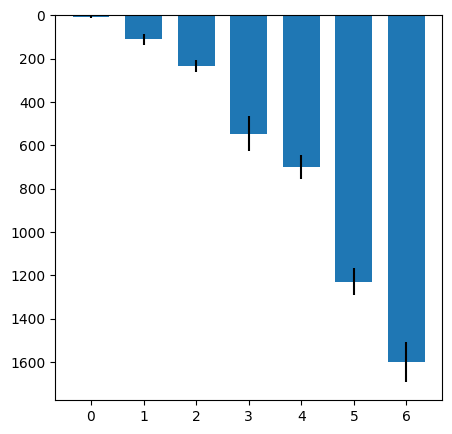

In [18]:
plt.figure(figsize=(5, 5))
p1 = plt.bar(ind, mean, width, yerr=std)
plt.gca().invert_yaxis()

plt.ylabel('minimun distance to Pia (um)')
plt.title('S1HL Layer minimun distance to Pia')
 
plt.xticks(ind, columns)   
    current_values = plt.gca().get_yticks()
    _=plt.gca().set_yticklabels(['{:.1e}'.format(x) for x in current_values])